# Neural-word-embeddings
Name : Venkata Badarinadh Gelli

Background :
This Assignment we will be using the most popular method Word Embedding to find out how it works 

Deep Learning for NLP is pattern recognition applied to words, sentences, and paragraphs, in much the same way that computer vision is pattern recognition to pixels.Like all other neural networks, deep-learning models don't take as input raw text: they only work with numeric tensors. Vectorizing text is the process of transforming text into numeric tensors. 

Requirements :
We will use the IMDB database and Glove model to create the word embedding

Environment:
Development - Colab GPU , Jupyter Notebook Repository : Github



# Import all Libraries

In [1]:
import numpy as np
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


Using TensorFlow backend.


# Request to get the IMDB data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!wget --no-check-certificate http://mng.bz/0tIo



--2020-03-21 13:17:05--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-03-21 13:17:05--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-03-21 13:17:06--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.102.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.102.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  22.0MB/s    in 2.6s    

2020-03-21 13:17:09 (22.0 MB/s) - ‘0tIo’ saved [60711700/6071170

In [0]:
!unzip -q 0tIo

# Read the IMDB Data and append labels 

In [0]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    #print(fname)
    if fname[-4:] == '.txt':
      #print('opening file', fname)
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

# Print the Length of the texts

In [5]:
print(len(texts))

25000


In [6]:

maxlen = 100                  # Define the maximum length of each record 
training_samples = 8000       # Define the number of samples to be taken for training
validation_samples = 10000    # Define number of validation samples. In this we will see that even less number of training samples than validation data also perform not very bad 
max_words = 10000             # Creates a tokenizer, configured to only take into account the 10,000 most common words


# Create Tokenizer , Fit it to the Texts and create a sequence of texts from the tokenizer 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
# Create a dictionary of the word and respective numeric index value 
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Define the sequence with the numeric indexes 
data = pad_sequences(sequences, maxlen=maxlen)
# variable for labels
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle the indices as the data are normally in group for each label 
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# Segreegate data for training and validation 
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# Download the Glove model . 
Here we are downloading the Glove6B model as our environment may not support heavier models than this due to memory constraints 

In [7]:

!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-03-21 13:20:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-21 13:20:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-21 13:20:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [8]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


We will use the glove model for 100 dimension . We can use heavier models but due to memory constraints we are using this one 

# Read the embedding file and load the data

In [9]:
glove_dir = '/content'
embeddings_index = {}

embedding_dim = 100
embedding_file_name = 'glove.6B.100d.txt'

f = open(os.path.join(glove_dir, embedding_file_name ))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


# Let's display some to see how it looks 

In [10]:
print(list(embeddings_index.keys())[0:100])


['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']


# Steps
1. Define a  blank Embedding_matrix
2. Update Embedding matrix by reading sequentially using the Embedding Index 

In [0]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector   # Words not found in the embedding index will be all zeros

# Define a Sequential model 
The Model consisits of 2 fully connected layers . This is one of the simple layers used as the intention here is to understand how word embedding works and not to go deeep models to improve the accuracy of the model. We will look into model training and performance improvement later


In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


1. Set the weights to the Embedding matrix 
2.  freeze the Embedding layer (set its trainable attribute to False) as we are using a pretrained model


In [13]:

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compile and train the model

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val)
                    )

model.save_weights('pre_trained_glove_model.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 10000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 375us/step - loss: 0.7189 - acc: 0.5615 - val_loss: 0.6259 - val_acc: 0.6544
Epoch 2/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.6028 - acc: 0.6785 - val_loss: 0.6633 - val_acc: 0.6172
Epoch 3/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.5052 - acc: 0.7568 - val_loss: 0.5863 - val_acc: 0.6912
Epoch 4/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4309 - acc: 0.8054 - val_loss: 0.5820 - val_acc: 0.7046
Epoch 5/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.3644 - acc: 0.8433 - val_loss: 0.5971 - val_acc: 0.7024
Epoch 6/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.3176 - acc: 0.8663 - val_loss: 0.6394 - val_acc: 0.7049
Epoch 7/100
8000/8000 [========

# Plot the Output to see the performance

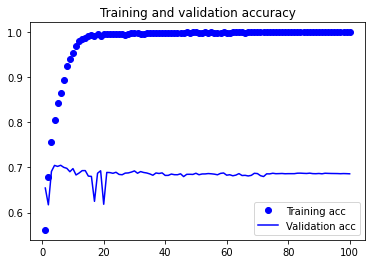

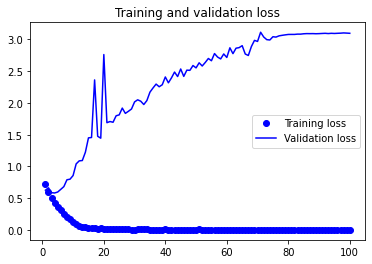

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()